In [4]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

%matplotlib inline
warnings.filterwarnings('ignore')

# data import
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [2]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


0    549
1    342
Name: Survived, dtype: int64

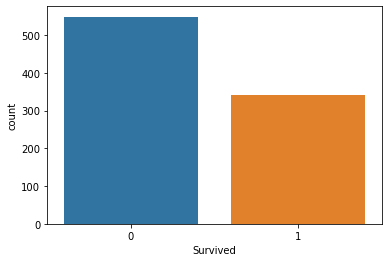

In [5]:
sns.countplot(train['Survived'])
train['Survived'].value_counts()

In [6]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

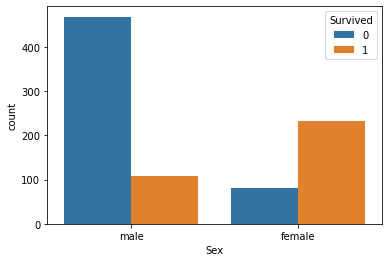

In [7]:
sns.countplot(data=train, x='Sex', hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

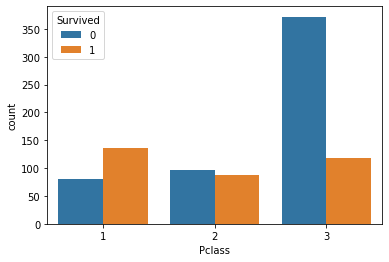

In [8]:
sns.countplot(data=train, x='Pclass', hue='Survived')

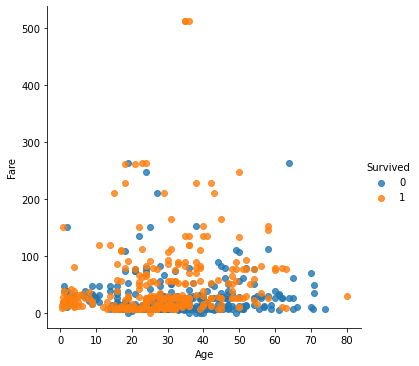

In [9]:
sns.lmplot(data=train, x='Age', y='Fare', fit_reg=False, hue='Survived')

In [11]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


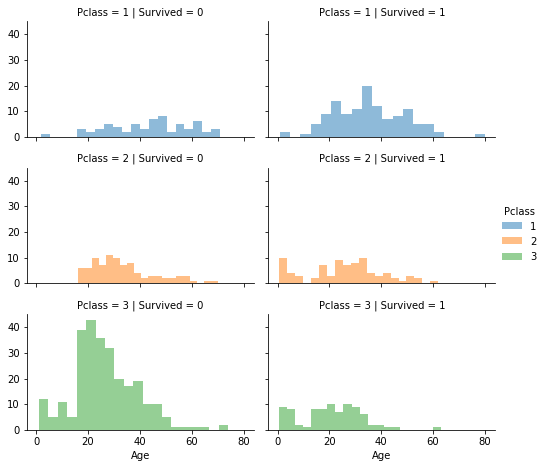

In [15]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', hue="Pclass", height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20) # 투명도(alpha): 0.5

# 범례 추가
grid.add_legend();

<AxesSubplot:xlabel='Embarked', ylabel='count'>

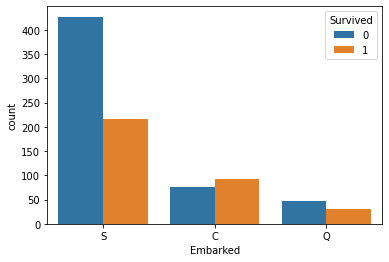

In [16]:
sns.countplot(data=train, x='Embarked', hue='Survived')

In [17]:
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [18]:
train['Embarked'].isnull().sum()
# 2

test['Embarked'].isnull().sum()
# 0

train['Embarked'].value_counts()
# output
# S    644
# C    168
# Q     77

train['Embarked'].fillna('S', inplace=True)

train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes

<AxesSubplot:xlabel='FamilySize', ylabel='count'>

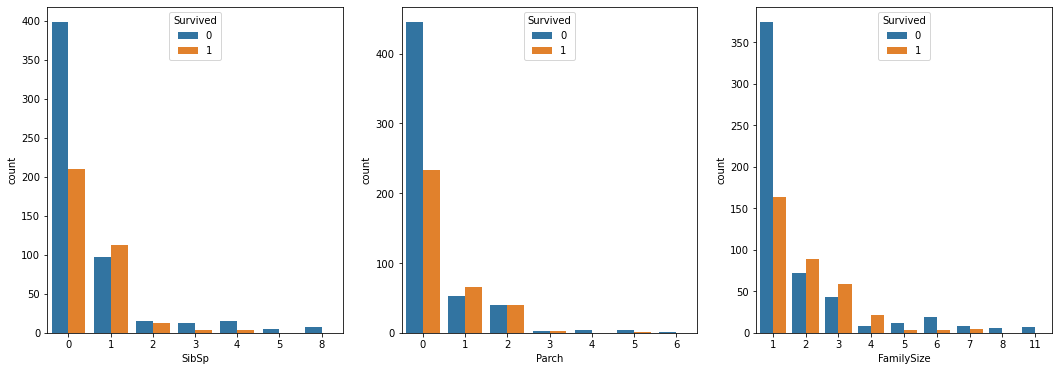

In [19]:
train['FamilySize']=train['SibSp']+train['Parch']+1
test['FamilySize']=test['SibSp']+test['Parch']+1

figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,6)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax2)
sns.countplot(data=train, x='FamilySize',hue='Survived', ax=ax3)

In [21]:
train['Solo'] = (train['FamilySize'] == 1)
test['Solo'] = (test['FamilySize'] == 1)

In [22]:
test.loc[test['Fare'].isnull(),'Fare']=0

<AxesSubplot:xlabel='Title', ylabel='count'>

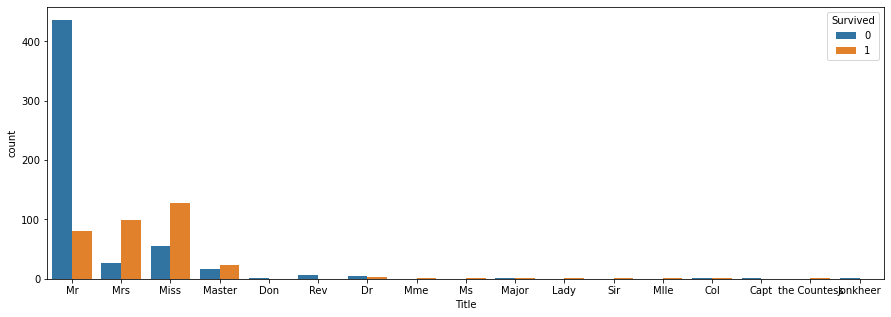

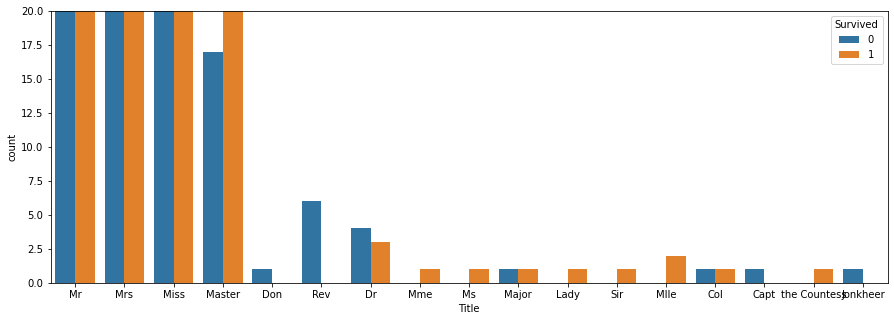

In [23]:
train['Name']

def split_title(row):
    return row.split(',')[1].split('.')[0].strip()
    
train['Title'] = train['Name'].apply(split_title)
test['Title'] = test['Name'].apply(split_title)

plt.figure(figsize=(15,5))
sns.countplot(data=train, x='Title', hue='Survived')

plt.figure(figsize=(15,5))
plt.ylim(0,20)
sns.countplot(data=train, x='Title', hue='Survived')

In [24]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

train['Title'].value_counts()
# Mr        517
# Miss      182
# Mrs       125
# Master     40
# Other      23
# Mlle        2
# Ms          1
# Mme         1
# Name: Title, dtype: int64

Mr        517
Miss      182
Mrs       125
Master     40
Other      23
Mlle        2
Mme         1
Ms          1
Name: Title, dtype: int64

In [29]:
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title'].value_counts()
# Mr        240
# Miss       79
# Mrs        72
# Master     21
# Other       6
# Name: Title, dtype: int64

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [30]:
train['Title_clean'] = train['Title'].astype('category').cat.codes
test['Title_clean'] = test['Title'].astype('category').cat.codes

In [31]:
train['Age'].isnull().sum()
# 177

test['Age'].isnull().sum()
# 86

train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [36]:
# Train
train.loc[ train['Age'] <= 10, 'Age_clean'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age_clean'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 20), 'Age_clean'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] <= 26), 'Age_clean'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] <= 30), 'Age_clean'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 36), 'Age_clean'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] <= 40), 'Age_clean'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] <= 46), 'Age_clean'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] <= 50), 'Age_clean'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age_clean'] = 9
train.loc[ train['Age'] > 60, 'Age_clean'] = 10

# Test
test.loc[ test['Age'] <= 10, 'Age_clean'] = 0
test.loc[(test['Age'] > 10) & (test['Age'] <= 16), 'Age_clean'] = 1
test.loc[(test['Age'] > 16) & (test['Age'] <= 20), 'Age_clean'] = 2
test.loc[(test['Age'] > 20) & (test['Age'] <= 26), 'Age_clean'] = 3
test.loc[(test['Age'] > 26) & (test['Age'] <= 30), 'Age_clean'] = 4
test.loc[(test['Age'] > 30) & (test['Age'] <= 36), 'Age_clean'] = 5
test.loc[(test['Age'] > 36) & (test['Age'] <= 40), 'Age_clean'] = 6
test.loc[(test['Age'] > 40) & (test['Age'] <= 46), 'Age_clean'] = 7
test.loc[(test['Age'] > 46) & (test['Age'] <= 50), 'Age_clean'] = 8
test.loc[(test['Age'] > 50) & (test['Age'] <= 60), 'Age_clean'] = 9
test.loc[ test['Age'] > 60, 'Age_clean'] = 10

In [33]:
train['Cabin'].str[:1].value_counts()

# C    59
# B    47
# D    33
# E    32
# A    15
# F    13
# G     4
# T     1
# Name: Cabin, dtype: int64

mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

train['Cabin_clean'] = train['Cabin'].str[:1]
train['Cabin_clean'] = train['Cabin_clean'].map(mapping)
train['Cabin_clean'] = train.groupby('Pclass')['Cabin_clean'].transform('median')

test['Cabin_clean'] = test['Cabin'].str[:1]
test['Cabin_clean'] = test['Cabin_clean'].map(mapping)
test['Cabin_clean'] = test.groupby('Pclass')['Cabin_clean'].transform('median')

train['Cabin_clean'].value_counts()
# 5.0    491
# 2.0    216
# 4.5    184
# Name: Cabin_clean, dtype: int64

test['Cabin_clean'].value_counts()
# 5.0    311
# 2.0    107
# Name: Cabin_clean, dtype: int64

5.0    311
2.0    107
Name: Cabin_clean, dtype: int64

In [38]:
feature = [
    'Pclass',
    'SibSp',
    'Parch',
    'Sex_clean',
    'Embarked_clean',
    'FamilySize',
    'Solo',
    'Title_clean',
    'Age_clean',
    'Cabin_clean'
]

label = [
    'Survived',
]

In [40]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

data = train[feature]
target = train[label]

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
cross_val_score(clf, data, target, cv=k_fold, scoring='accuracy', ).mean()


0.8237952559300874

In [43]:
from sklearn.tree import DecisionTreeClassifier

data = train[feature]
target = train[label]


k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
model=DecisionTreeClassifier(max_depth=8, random_state=18)
cross_val_score(model, data, target, cv=k_fold, scoring='accuracy', ).mean()

0.8103495630461921

In [46]:
X = train[feature]
y = train[label]



from sklearn.model_selection import train_test_split

# 학습 데이터와 검증 데이터 비율은 75%, 25%
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=.75, random_state=100)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

estimators = [('imputer', SimpleImputer()), ('rf_cls', RandomForestClassifier(n_jobs=-1))]

# 파이프라인 선언
pipe = Pipeline(estimators)

# 튜닝할 파라미터 종류 및 범위
dists = {
    "imputer__strategy": ['mean', 'median'],
    "rf_cls__class_weight": ['balanced', 'balanced_subsample', None],
    "rf_cls__n_estimators": range(100, 200, 5),
    "rf_cls__max_features": range(1, 10),
    "rf_cls__criterion": ['entropy', 'gini']
}

# 랜덤 조합으로 최적의 하이퍼파라미터 찾아주는 RandomizedSearchCV
clf = RandomizedSearchCV(pipe, param_distributions=dists, n_iter=50, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# 학습
clf.fit(X_train, y_train)

# 최적의 하이퍼파라미터 조합
best_fit = clf.best_estimator_

# 모델 성능 평가 - accuracy score
print(f'accuracy score: {clf.best_score_}\n')

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   25.8s finished


accuracy score: 0.7978830848786006

